# Feature importance

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_excel("data_cleaned.xlsx")
data = data.drop('Unnamed: 0', axis=1)
data = data.apply(pd.to_numeric, errors='coerce')

In [2]:
data.rename(columns={'Anksioznost': 'Anxiety', 'Interakcija_kvalitativno': 'Interaction_qualitative','Interakcija_kvantitativno': 'Interaction_quantitative','Introvertiranost': 'Introversion',"Motivacija":"Motivation","Ocena":"Grade","Profesor":"Professor","Razred":"Class","Spol":"Gender","Uspesnost":"Successfulness"}, inplace=True)


Shapiro-Wilk Test Results for Anxiety:
P-value: 0.4596
The data in Anxiety looks Gaussian (fail to reject H0)


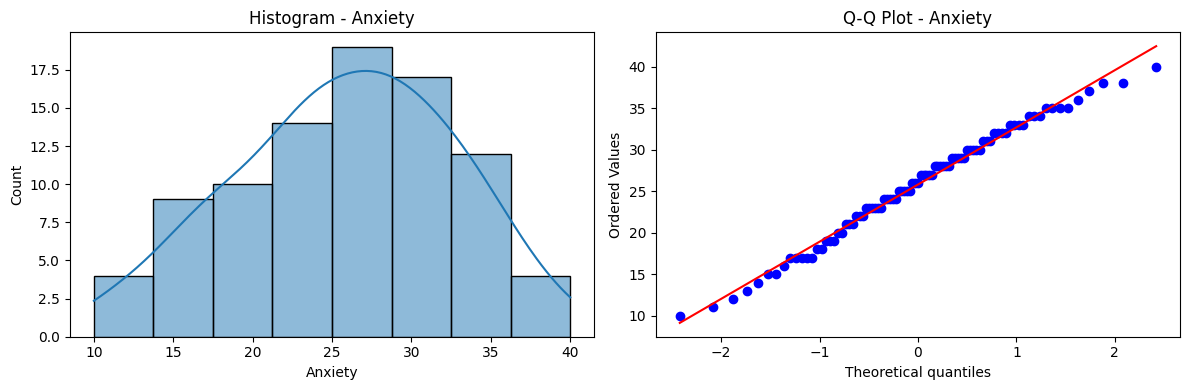

Shapiro-Wilk Test Results for Motivation:
P-value: 0.4994
The data in Motivation looks Gaussian (fail to reject H0)


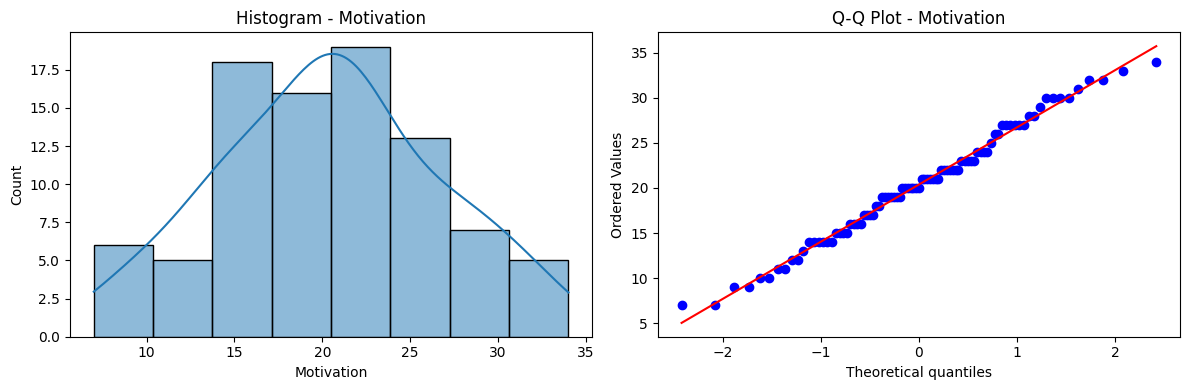

Shapiro-Wilk Test Results for Introversion:
P-value: 0.3221
The data in Introversion looks Gaussian (fail to reject H0)


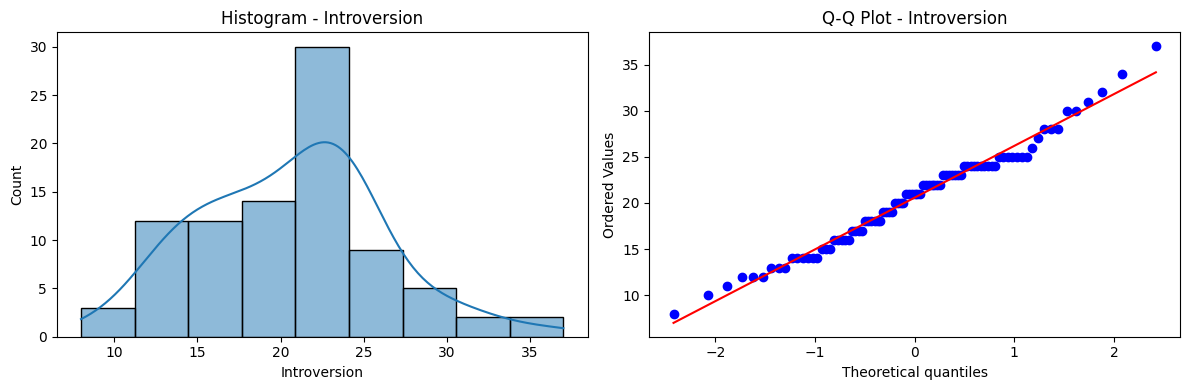

Shapiro-Wilk Test Results for Judging:
P-value: 0.6426
The data in Judging looks Gaussian (fail to reject H0)


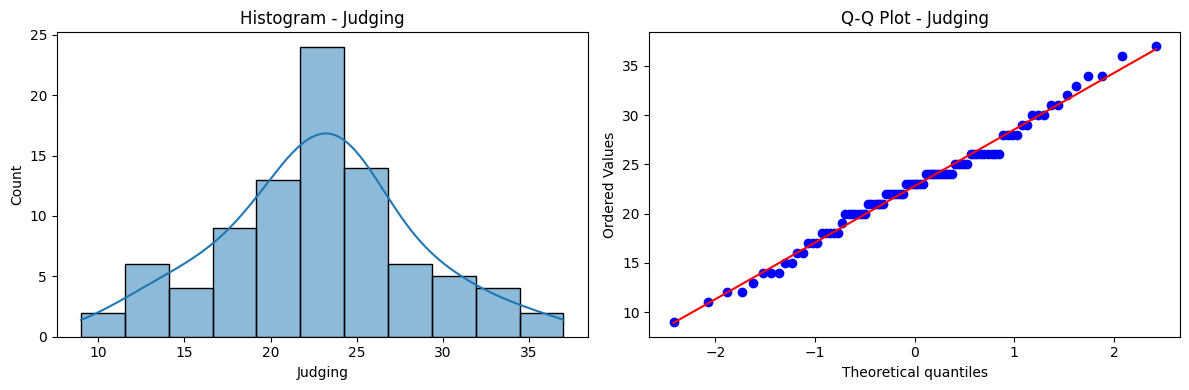

Shapiro-Wilk Test Results for Feeling:
P-value: 0.0530
The data in Feeling looks Gaussian (fail to reject H0)


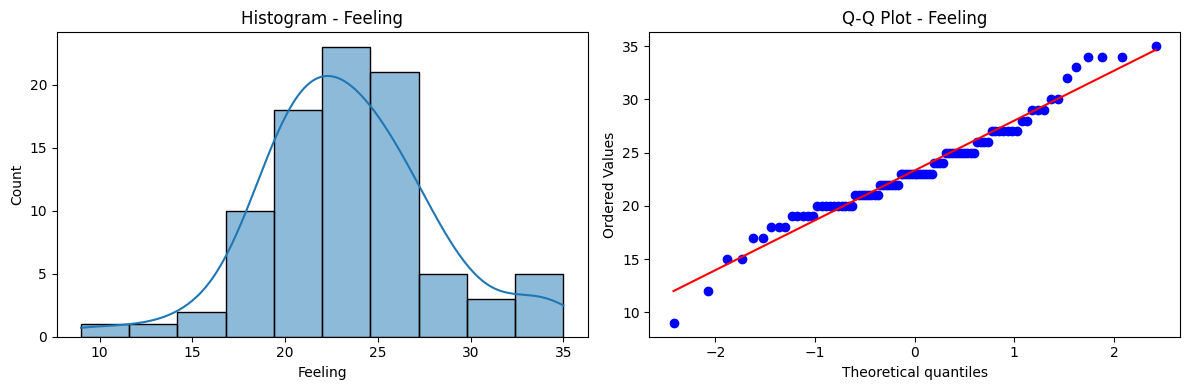

Shapiro-Wilk Test Results for Sensing:
P-value: 0.2183
The data in Sensing looks Gaussian (fail to reject H0)


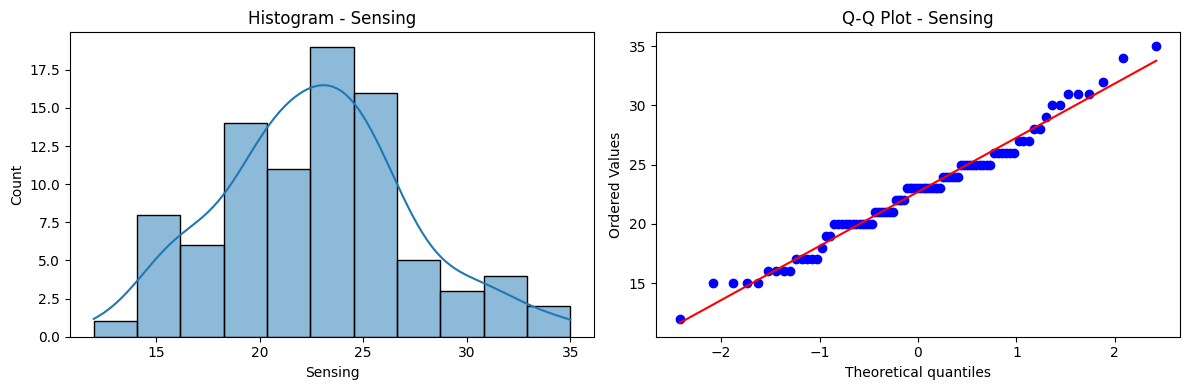

In [3]:
import numpy as np
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset (replace 'your_data.csv' with your file)
data = data  # Replace 'df' with your actual DataFrame

# Specify the columns to test for normality
columns_to_test = ['Anxiety', 'Motivation', 'Introversion', 'Judging', 'Feeling', 'Sensing']

for column in columns_to_test:
    # Perform Shapiro-Wilk test for the current column
    statistic, p_value = shapiro(data[column])
    
    # Display normality assessment
    print(f"Shapiro-Wilk Test Results for {column}:")
    print(f"P-value: {p_value:.4f}")
    if p_value > 0.05:
        print(f"The data in {column} looks Gaussian (fail to reject H0)")
    else:
        print(f"The data in {column} does not look Gaussian (reject H0)")
    
    # Visual assessment of normality for the current column
    plt.figure(figsize=(12, 4))
    
    # Histogram for the current column
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram - {column}')
    
    # Q-Q plot for the current column
    plt.subplot(1, 2, 2)
    probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - {column}')
    
    plt.tight_layout()
    plt.show()


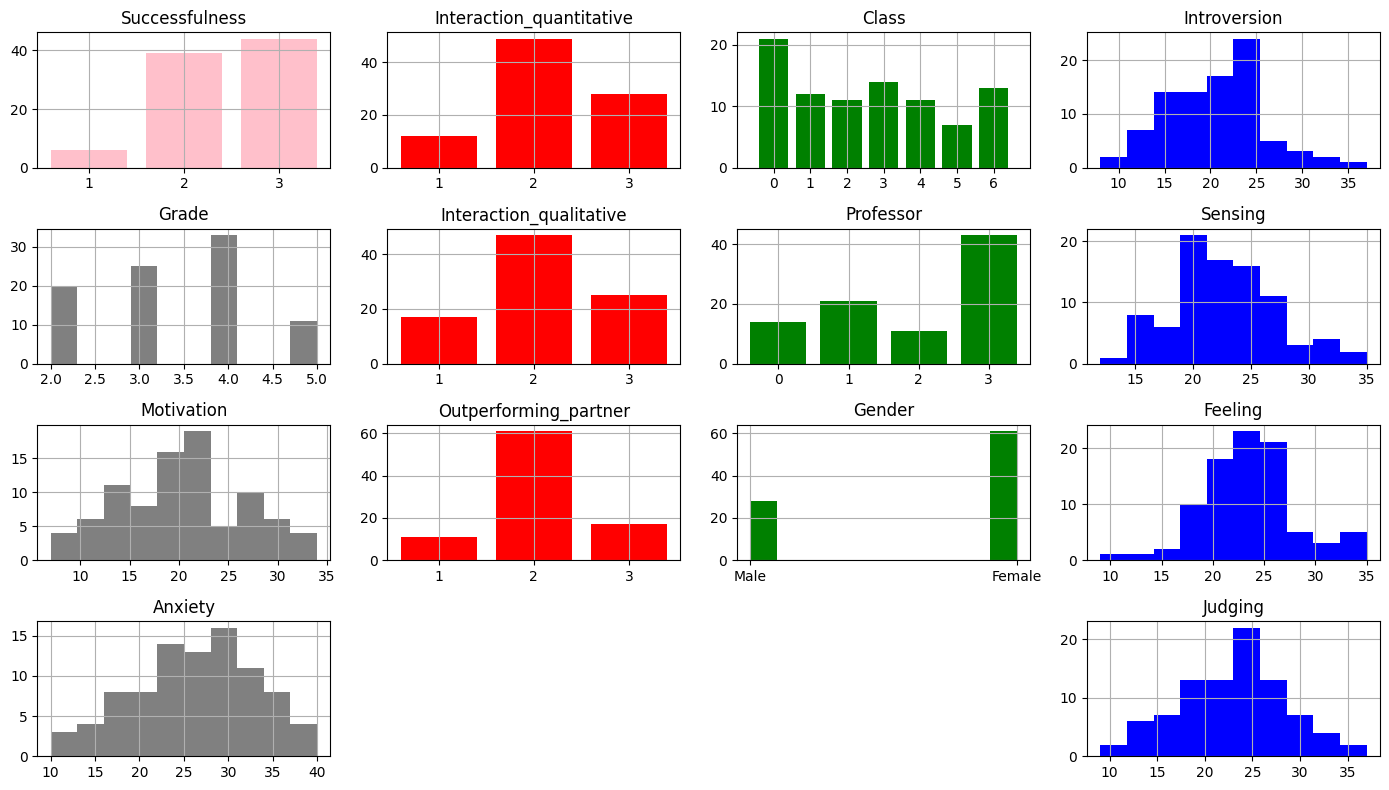

In [4]:
import matplotlib.pyplot as plt
import numpy as np

columns_to_plot = data.columns

colors = {
    'Introversion': 'blue',
    'Judging': 'blue',
    'Feeling': 'blue',
    'Sensing': 'blue',
    'Class': 'green',
    'Professor': 'green', 
    'Gender': 'green',
    'Interaction_qualitative': 'red',
    'Interaction_quantitative': 'red',
    'Outperforming_partner': 'red'
}

# Custom labels for Gender column
gender_labels = {
    0: 'Male',
    1: 'Female'
}

# Handling Successfulness separately in case of issues
successfulness_col = 'Successfulness'

color_categories = {}
for col in columns_to_plot:
    color = colors.get(col, 'gray')
    if color not in color_categories:
        color_categories[color] = []
    color_categories[color].append(col)

# Ensure Successfulness stays in the original position
if successfulness_col in color_categories['gray']:
    color_categories['gray'].remove(successfulness_col)
    color_categories['gray'].insert(columns_to_plot.get_loc(successfulness_col), successfulness_col)

num_categories = len(color_categories)
num_plots = max(len(cols) for cols in color_categories.values())

plt.figure(figsize=(14, 8))

for i, (color, cols) in enumerate(color_categories.items()):
    for j, col in enumerate(cols):
        plt.subplot(num_categories, num_plots, j * num_categories + i + 1)
        if col in ['Professor', 'Interaction_qualitative', 'Interaction_quantitative', 'Outperforming_partner']:
            # Calculate bin edges to center bins around whole numbers for specific columns
            bin_edges = np.arange(int(data[col].min()) - 0.5, int(data[col].max()) + 1.5, 1)
            data[col].astype(int).hist(bins=bin_edges, color=colors[col], align='mid', rwidth=0.8)
            plt.xticks(range(int(data[col].min()), int(data[col].max()) + 1))  # Set x-axis ticks to whole numbers
        elif col == 'Gender':
            # Custom tick labels for Gender column
            plt.xticks([0, 1], [gender_labels.get(0, '0'), gender_labels.get(1, '1')])
            data[col].hist(color=color)
        elif col == 'Class':
            # Customizing bins to center bars in Class column and prevent touching
            data[col].hist(bins=np.arange(data[col].min() - 0.5, data[col].max() + 1.5, 1), color=color, rwidth=0.8)
            plt.xticks(np.arange(data[col].min(), data[col].max() + 1))  # Set x-axis ticks to whole numbers
            plt.xlim(data[col].min() - 1, data[col].max() + 1)  # Adjusting x-axis limit
        elif col == successfulness_col:
            # Handling Successfulness separately
            bin_edges = np.arange(int(data[successfulness_col].min()) - 0.5, int(data[successfulness_col].max()) + 1.5, 1)
            data[successfulness_col].astype(int).hist(bins=bin_edges, color='pink', align='mid', rwidth=0.8)
            plt.xticks(range(int(data[successfulness_col].min()), int(data[successfulness_col].max()) + 1))
        else:
            data[col].hist(color=color)
        plt.title(col)

# Place the legend using coordinates

plt.tight_layout()
plt.show()


In [5]:
X = data.drop("Successfulness", axis=1)
y = data["Successfulness"]

In [6]:
X.head()
np.random.seed(1234)

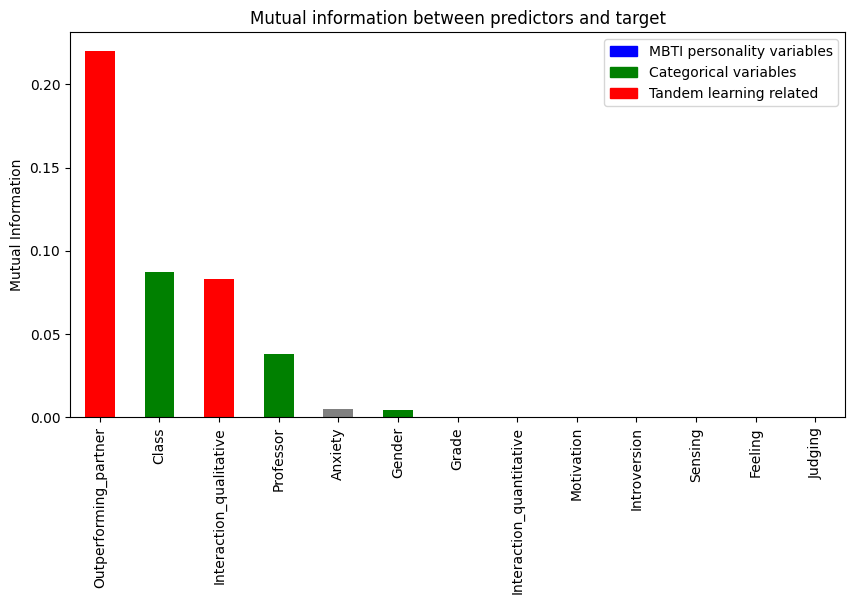

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Assuming X and y are defined

# Compute mutual information
mi = mutual_info_classif(X, y, discrete_features=[4,5,6])

mi = pd.Series(mi)
mi.index = X.columns
sorted_mi = mi.sort_values(ascending=False)

# Define columns to highlight and their respective colors
highlight_cols1 = ['Introversion', 'Judging', 'Feeling', 'Sensing']
highlight_color1 = 'blue'  # Define color for first group of highlighted columns

highlight_cols2 = ['Class', 'Professor', 'Gender']
highlight_color2 = 'green'  # Define color for second group of highlighted columns

highlight_cols3 = ['Interaction_qualitative', 'Interaction_quantitative', "Outperforming_partner"]
highlight_color3 = 'red'  # Define color for second group of highlighted columns

# Plotting the bar chart with highlighted columns
highlight_colors = {col: highlight_color1 for col in highlight_cols1}
highlight_colors.update({col: highlight_color2 for col in highlight_cols2})
highlight_colors.update({col: highlight_color3 for col in highlight_cols3})

ax = sorted_mi.plot.bar(figsize=(10, 5), color=[highlight_colors.get(col, 'gray') for col in sorted_mi.index])

plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")


legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in [highlight_color1, highlight_color2, highlight_color3]]

legend_labels = [
    'MBTI personality variables',
    'Categorical variables',
    'Tandem learning related',
    'Other Variables'
]

ax.legend(legend_patches, legend_labels)

plt.show()

In [8]:
"""from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y, discrete_features=[3,4,5])

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")"""

'from sklearn.feature_selection import mutual_info_classif\nmi = mutual_info_classif(X, y, discrete_features=[3,4,5])\n\nmi = pd.Series(mi)\nmi.index = X.columns\nmi.sort_values(ascending=False).plot.bar(figsize=(10, 5))\nplt.ylabel(\'Mutual Information\')\nplt.title("Mutual information between predictors and target")'

In [9]:
print(mi.sort_values(ascending=False).round(3).to_string(index=False))


0.220
0.087
0.083
0.038
0.005
0.005
0.000
0.000
0.000
0.000
0.000
0.000
0.000


In [10]:
mi.sort_values(ascending=False).round(3)

Outperforming_partner       0.220
Class                       0.087
Interaction_qualitative     0.083
Professor                   0.038
Anxiety                     0.005
Gender                      0.005
Grade                       0.000
Interaction_quantitative    0.000
Motivation                  0.000
Introversion                0.000
Sensing                     0.000
Feeling                     0.000
Judging                     0.000
dtype: float64

# Korelacijska matrika

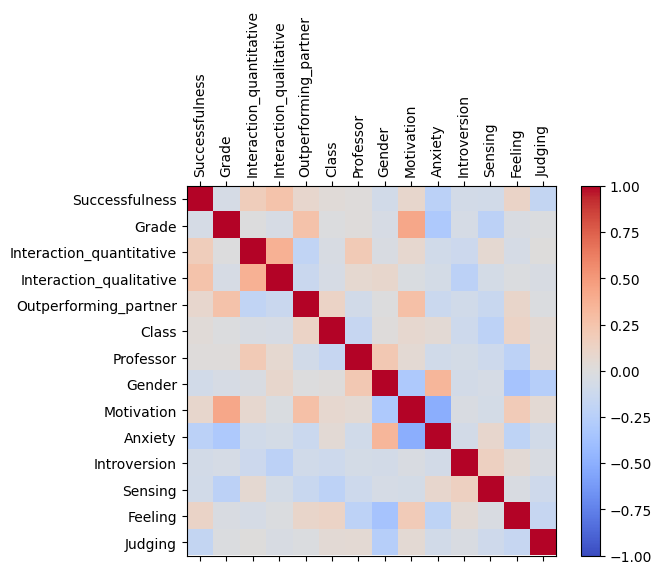

In [19]:
import matplotlib.pyplot as plt

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

3 most negative correlated feature pairs:
Motivation - Anxiety: -0.500698602603003
Gender - Feeling: -0.35811181406431863
Gender - Motivation: -0.3118603152482401

3 most positive correlated feature pairs:
Gender - Anxiety: 0.3410278543669907
Interaction_quantitative - Interaction_qualitative: 0.3719764164733151
Grade - Motivation: 0.42633550970406453


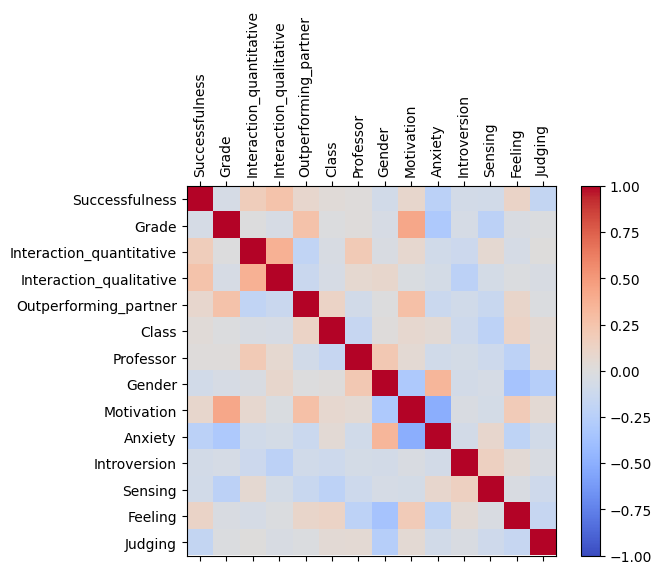

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
corr = data.corr()

# Extracting the upper triangular part of the correlation matrix
upper_tri = np.triu(corr, k=1)

# Finding indices of the 3 most negative and 3 most positive correlations
most_negative_indices = np.unravel_index(np.argsort(upper_tri, axis=None)[:3], upper_tri.shape)
most_positive_indices = np.unravel_index(np.argsort(upper_tri, axis=None)[-3:], upper_tri.shape)

# Extracting corresponding feature names and correlation coefficients
most_negative_features = [(data.columns[i], data.columns[j]) for i, j in zip(*most_negative_indices)]
most_positive_features = [(data.columns[i], data.columns[j]) for i, j in zip(*most_positive_indices)]
most_negative_corr = [corr.iloc[i, j] for i, j in zip(*most_negative_indices)]
most_positive_corr = [corr.iloc[i, j] for i, j in zip(*most_positive_indices)]

# Printing the results
print("3 most negative correlated feature pairs:")
for feature_pair, correlation in zip(most_negative_features, most_negative_corr):
    print(f"{feature_pair[0]} - {feature_pair[1]}: {correlation}")

print("\n3 most positive correlated feature pairs:")
for feature_pair, correlation in zip(most_positive_features, most_positive_corr):
    print(f"{feature_pair[0]} - {feature_pair[1]}: {correlation}")




RFE 
https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # or any model you prefer
import pandas as pd

# Assuming X contains your features (both categorical and continuous)
# and y contains your target variable

model = LogisticRegression()  # Replace this with any model you prefer
num_features_to_select = 3  # Select the number of features you want
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get ranking of features
feature_ranking = rfe.ranking_

# Get selected feature names and their rankings
selected_features = X.columns[selected_indices]  # Assuming X is a pandas DataFrame
selected_features_ranking = {feat: rank for feat, rank in zip(X.columns, feature_ranking)}

# Transform X to include only selected features
X_selected = X.iloc[:, selected_indices]

# Now you can use X_selected for modeling with selected features

# Print selected features and their rankings
print("Selected Features and Their Rankings:")
for feature, rank in selected_features_ranking.items():
    print(f"Feature: {feature}, Rank: {rank}")

Selected Features and Their Rankings:
Feature: Grade, Rank: 4
Feature: Interaction_quantitative, Rank: 2
Feature: Interaction_qualitative, Rank: 1
Feature: Outperforming_partner, Rank: 1
Feature: Class, Rank: 5
Feature: Professor, Rank: 3
Feature: Gender, Rank: 1
Feature: Motivation, Rank: 11
Feature: Anxiety, Rank: 8
Feature: Introversion, Rank: 10
Feature: Sensing, Rank: 6
Feature: Feeling, Rank: 7
Feature: Judging, Rank: 9


c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\borbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

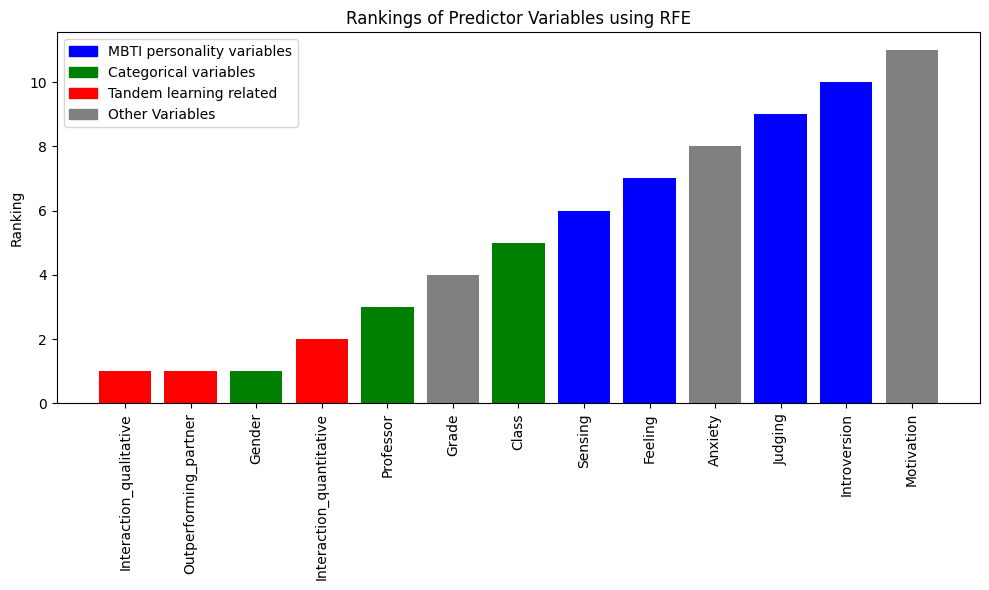

In [23]:

highlight_cols1 = ['Introversion', 'Judging', 'Feeling', 'Sensing']
highlight_color1 = 'blue'  # Define color for first group of highlighted columns

highlight_cols2 = ['Class', 'Professor', 'Gender']
highlight_color2 = 'green'  # Define color for second group of highlighted columns

highlight_cols3 = ['Interaction_qualitative', 'Interaction_quantitative', "Outperforming_partner"]
highlight_color3 = 'red'  # Define color for second group of highlighted columns

# Plotting the bar chart with highlighted columns
highlight_colors = {col: highlight_color1 for col in highlight_cols1}
highlight_colors.update({col: highlight_color2 for col in highlight_cols2})
highlight_colors.update({col: highlight_color3 for col in highlight_cols3})

# Assuming selected_features_ranking is already computed as in your previous code
# Sort the features by their ranking
sorted_features = sorted(selected_features_ranking.items(), key=lambda x: x[1])

# Extract feature names and their rankings
features = [feat for feat, _ in sorted_features]
ranks = [rank for _, rank in sorted_features]

# Create a color list based on the previously defined highlight_colors
colors_for_ranks = [highlight_colors.get(col, 'gray') for col in features]

# Plotting the ranks of predictor variables with color based on the ranks
plt.figure(figsize=(10, 6))
bars = plt.bar(features, ranks, color=colors_for_ranks)  # Use plt.bar() for vertical bars
plt.ylabel('Ranking')  # Update ylabel to 'Ranking' for vertical bars
plt.title('Rankings of Predictor Variables using RFE')
#plt.gca().invert_xaxis()  # Invert x-axis for vertical bars
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Creating legend handles for the colors used
legend_patches = [
    plt.Rectangle((0, 0), 1, 1, color=color) for color in [highlight_color1, highlight_color2, highlight_color3, 'gray']
]

# Define legend labels
legend_labels = [
    'MBTI personality variables',
    'Categorical variables',
    'Tandem learning related',
    'Other Variables'
]

plt.legend(legend_patches, legend_labels)

plt.tight_layout()
plt.show()

In [ ]:
df=data
list(df.columns)

['Successfulness',
 'Grade',
 'Interaction_quantitative',
 'Interaction_qualitative',
 'Outperforming_partner',
 'Class',
 'Professor',
 'Gender',
 'Motivation',
 'Anxiety',
 'Introversion',
 'Sensing',
 'Feeling',
 'Judging']

### Tole je internal consistency za zvezne

In [9]:
from factor_analyzer import FactorAnalyzer

# Assuming 'df' is your DataFrame with the required data
selected_columns = ['Class', 'Professor', 'Gender']  # Replace with your categorical columns
numeric_columns = ['Successfulness', 'Grade', 'Interaction_quantitative', 'Interaction_qualitative',
                   'Outperforming_partner', 'Motivation', 'Anxiety', 'Introversion', 'Sensing', 'Feeling', 'Judging']  # Replace with your numeric columns
continuous_columns =['Motivation', 'Anxiety', 'Introversion', 'Sensing', 'Feeling', 'Judging']

data = df[continuous_columns]

fa = FactorAnalyzer(method='minres')

# Initialize an empty list to store computed McDonald's Omega values
omega_values = []

# Number of bootstrap samples
num_samples = 500  # You can adjust this number based on your requirements

for _ in range(num_samples):
    # Sample with replacement from the data
    bootstrap_sample = data.sample(n=len(data), replace=True)
    
    # Fit the factor analysis model to the bootstrap sample
    fa.fit(bootstrap_sample)
    
    # Calculate factor loadings
    loadings = fa.loadings_
    
    # Calculate error variances (unique variances)
    error_variances = 1 - np.square(loadings)
    
    # Calculate McDonald's Omega for the bootstrap sample
    omega = 1 - (np.sum(error_variances) / np.sum(1 + error_variances))
    
    # Append the calculated Omega to the list
    omega_values.append(omega)

# Compute the 95% confidence interval for McDonald's Omega
confidence_interval = np.percentile(omega_values, [2.5, 97.5])

# Compute the mean value of McDonald's Omega
mean_omega = np.mean(omega_values)

print("95% Confidence Interval for McDonald's Omega:")
print(confidence_interval)
print(f"Mean value of McDonald's Omega: {mean_omega}")

95% Confidence Interval for McDonald's Omega:
[0.53228696 0.56182381]
Mean value of McDonald's Omega: 0.5471697613514969


In [ ]:
import pingouin as pg

data = df
selected_columns = ['Successfulness',
 'Grade',
 'Interaction_quantitative',
 'Interaction_qualitative',
 'Outperforming_partner',
 'Motivation',
 'Anxiety',
 'Sensing',
 'Feeling',
 'Judging',
 'Introversion']
data = data[selected_columns]

pg.cronbach_alpha(data=data)

(-0.6298758969959576, array([-1.182, -0.17 ]))

### Internal consistency za kategoricne

In [6]:
df=data

def krippendorff_alpha(data, nominal_metric):
    N = len(data)
    observed_disagreements = 0
    expected_disagreements = 0
    
    for col1 in nominal_metric:
        for col2 in nominal_metric:
            if col1 != col2:
                observed_disagreements += np.sum(data[col1] != data[col2])
                expected_disagreements += np.sum(data[col1] == data[col2])
    
    expected_disagreements /= (len(nominal_metric) * (len(nominal_metric) - 1))
    
    try:
        alpha = 1 - (observed_disagreements / (N * expected_disagreements))
    except ZeroDivisionError:
        alpha = 0
    
    return alpha

def bootstrap_krippendorff_alpha(data, nominal_metric, num_iterations=1000, confidence_level=0.95):
    alpha_values = []
    
    for _ in range(num_iterations):
        sampled_data = data.apply(lambda x: x.sample(n=len(x), replace=True).reset_index(drop=True))
        alpha_val = krippendorff_alpha(sampled_data, nominal_metric)
        alpha_values.append(alpha_val)
    
    lower_bound = np.percentile(alpha_values, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(alpha_values, (1 + confidence_level) / 2 * 100)
    
    mean_value = np.mean(alpha_values)
    
    return lower_bound, upper_bound, mean_value

# Example usage:
# Assuming 'df' is your pandas DataFrame and 'columns_list' is a list of columns containing categorical data
columns_list = ["Class", "Gender", "Professor"]
lower_alpha, upper_alpha, mean_alpha = bootstrap_krippendorff_alpha(df, columns_list)
print(f"95% Confidence Interval for Krippendorff's Alpha: ({lower_alpha}, {upper_alpha})")
print(f"Mean value of Krippendorff's Alpha: {mean_alpha}")


95% Confidence Interval for Krippendorff's Alpha: (0.5670585874799361, 0.7770931496919173)
Mean value of Krippendorff's Alpha: 0.6807377859928326


### Internal consistency za ordinalne

In [8]:
from scipy.stats import kendalltau

# Replace 'df' with your actual DataFrame
data = df

def gutman_lambda(df, columns):
    corr_matrix = pd.DataFrame(index=columns, columns=columns)
    
    for col1 in columns:
        for col2 in columns:
            corr, _ = kendalltau(df[col1], df[col2])
            corr_matrix.loc[col1, col2] = corr
    
    lambda_val = 1 - (1 / (len(columns) * (len(columns) - 1))) * sum([sum([corr_matrix.loc[col1, col2] for col2 in columns]) for col1 in columns])
    return lambda_val

# Function to calculate Gutman's Lambda with bootstrapping
def bootstrap_gutman_lambda(df, columns, num_iterations=1000, confidence_level=0.95):
    lambda_values = []
    
    for _ in range(num_iterations):
        sampled_df = df.sample(frac=1, replace=True)  # Resampling with replacement
        lambda_val = gutman_lambda(sampled_df, columns)
        lambda_values.append(lambda_val)
    
    # Calculating the confidence interval
    lower_bound = np.percentile(lambda_values, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(lambda_values, (1 + confidence_level) / 2 * 100)
    
    # Calculating the mean value
    mean_value = np.mean(lambda_values)
    
    return lower_bound, upper_bound, mean_value

# Example usage:
# Assuming 'df' is your pandas DataFrame and 'cols' is a list of columns containing categorical data
columns_list = ["Outperforming_partner", "Interaction_qualitative", "Interaction_quantitative","Successfulness","Grade"]
lower, upper, mean = bootstrap_gutman_lambda(df, columns_list)
print(f"95% Confidence Interval for Gutman's Lambda: ({lower}, {upper})")
print(f"Mean value of Gutman's Lambda: {mean}")


95% Confidence Interval for Gutman's Lambda: (0.6025082669948066, 0.7597428470542884)
Mean value of Gutman's Lambda: 0.6853914218567217


In [ ]:
description = df.describe().round(2)

# Save the description as a CSV file
description.to_csv('dataset_description.csv', sep=',')

### testi s p-values

In [ ]:
X = data.drop("Successfulness", axis=1)
y = data["Successfulness"]

In [ ]:

# Separate your features into categorical, continuous, and ordinal (assuming likert_scale)
categorical_features = ['Gender', 'Class', 'Professor']
continuous_features = ['Motivation', 'Anxiety',"Introversion","Sensing","Feeling","Judging"]
ordinal_features = ['Grade', 'Interaction_quantitative',"Interaction_qualitative","Outperforming_partner"]

# Chi-square test for categorical features
from scipy.stats import chi2_contingency, f_oneway, kruskal



for cat_feature in categorical_features:
    contingency_table = pd.crosstab(data[cat_feature], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test p-value for {cat_feature}: {p:.3f}")

# ANOVA for continuous features
for cont_feature in continuous_features:
    groups = [data[y == state][cont_feature] for state in y.unique()]
    f_stat, p = f_oneway(*groups)
    print(f"ANOVA p-value for {cont_feature}: {p:.3f}")

# Kruskal-Wallis test for ordinal features (Likert scale)
for ord_feature in ordinal_features:
    groups = [data[y == state][ord_feature] for state in y.unique()]
    h_stat, p = kruskal(*groups)
    print(f"Kruskal-Wallis p-value for {ord_feature}: {p:.3f}")

Chi-square test p-value for Gender: 0.684
Chi-square test p-value for Class: 0.355
Chi-square test p-value for Professor: 0.394
ANOVA p-value for Motivation: 0.468
ANOVA p-value for Anxiety: 0.091
ANOVA p-value for Introversion: 0.596
ANOVA p-value for Sensing: 0.549
ANOVA p-value for Feeling: 0.550
ANOVA p-value for Judging: 0.246
Kruskal-Wallis p-value for Grade: 0.717
Kruskal-Wallis p-value for Interaction_quantitative: 0.245
Kruskal-Wallis p-value for Interaction_qualitative: 0.048
Kruskal-Wallis p-value for Outperforming_partner: 0.553
